## Extra exercise: Julia set

We have computed the [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set) in the previous exercise, where we mainly investigated the complex number $c$. Now if we switch our focus from $c$ to $z$, we will be looking into the [Julia set](https://en.wikipedia.org/wiki/Julia_set).

If we look back into the definition of the [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set) at the begining of this exercise. This time we fix the complex number $c$ as a constant. For this given $c$ value in the iteration

$$z_{n+1} = z_n^2 + c ,$$

all the staring values $z_1$ making this iteration converge are the Julia set of $c$.

As you may notice, this time instead of setting $z_1=0$, we will loop over all the $z_1$ values for a fixed value $c$. The good news is that since the equation for the iteration remains the same, we can still use the same criterion to validate if it converges.

Same as the last exercise we set up a finite searching space:

In [1]:
# Define a finite extent
CENTER = 0.0 + 0.0j # Location of the extent center
EXTENT = 4.0 + 3.0j # EXTENT = 4.0 + 3.0j # Extent length (real + imaginary)

# Select finite number of complex numbers
# In total width*height complex numbers will be inspected 
WIDTH = 256 # number of elemtes along the real axis
HEIGHT = 256 # number of elemtes along the imaginary axis

# Finite iterations
MAX_ITER = 256 # Max number of iterations per complex number

# Select a complex number
C = -0.5+0.6j

Then we create a simple loop to search for all the $z_1$ making the iteration converge.

In [2]:
import numpy as np

def compute_julia(width=WIDTH, height=HEIGHT, center=CENTER, extent=EXTENT, max_iter=MAX_ITER, c=C):
    niters = np.zeros((width, height), int)
    scale = max(extent.real/width, extent.imag/height)

    # Loop through all selected complex number within the extent
    for j in range(height):
        for i in range(width):
            z = center + (i - width // 2 + (j - height // 2)*1j) * scale

            # Per complex number, validate it for a finite number of iterations
            for k in range(max_iter):
                z = z**2 + c

                # if the modulus (or absolute value) of the complex number is greater than 2,
                # it will diverge, thus not within Mandelbrot set
                if np.absolute(z) > 2.0: 
                    break

            niters[j, i] = k
    return niters

Compute the Julia set for the chosen $c$

In [3]:
niters = compute_julia()

And visualize the result

Text(0, 0.5, '$\\Im(c)$')

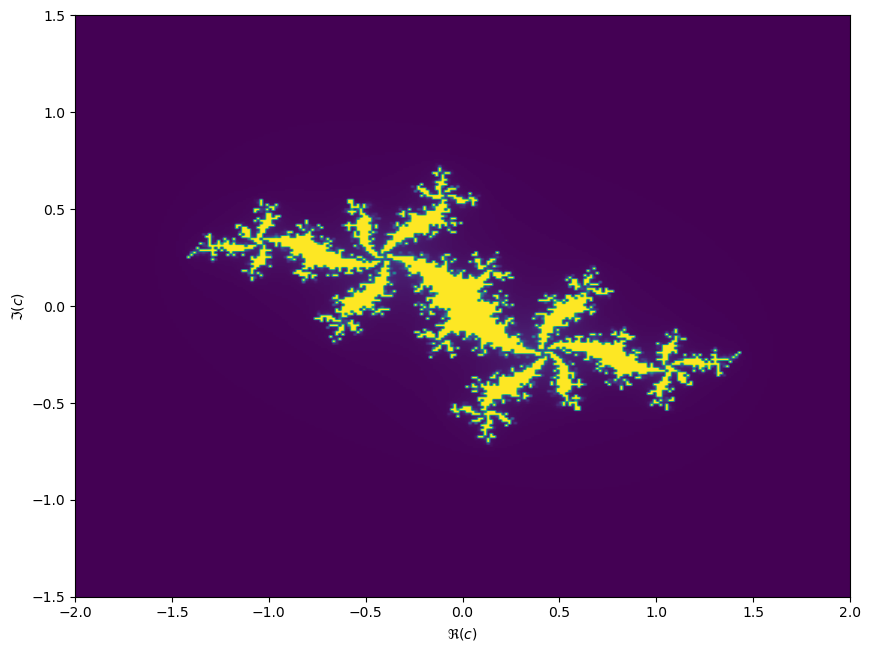

In [4]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10,10))
c0, c1 = CENTER - EXTENT / 2, CENTER + EXTENT / 2
plot_extent = (c0.real, c1.real, c0.imag, c1.imag)

ax.imshow(niters, origin='lower', extent=plot_extent)
ax.set_xlabel("$\Re(c)$")
ax.set_ylabel("$\Im(c)$")

In [5]:
%timeit compute_julia()

1.17 s ± 31.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


So all the bright yellow pixels are considered to be $z_1$ which are wthin the Julia set of $c$. Same as the last exercise, can you make the iteration faster? Try to reuse as much code as you can from the first part. Big hint, the `compute_mandelbrot` function can be further generalised by passing a function argument like so:

In [6]:
def compute_fractal(f, width, height, center, extent, *args):
    niters = np.zeros((width, height), int)
    scale = max(extent.real / width, extent.imag / height)

    # Loop through all selected complex number within the extent
    for j in range(height):
        for i in range(width):
            c = center + (i - width // 2 + (j - height //2) * 1j) * scale
            
            # call the given routine, with added arguments
            k = f(c, *args)
            
            niters[j, i] = k
    return niters